In [7]:
import numpy as np
import pandas as pd
import inclassfakejobs

In [8]:
df = pd.read_csv('../inclassfakejobs/train.csv')
i_before = df['Id']

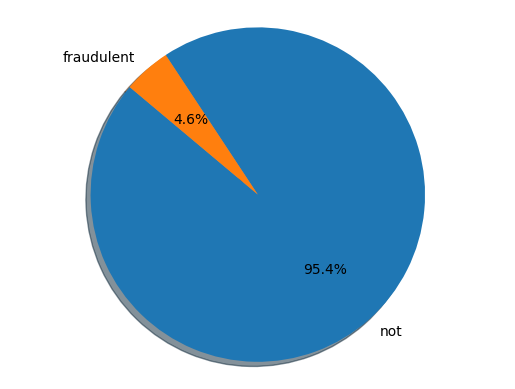

In [9]:
import matplotlib.pyplot as plt
labels = ['not', 'fraudulent']
sizes = df['fraudulent'].value_counts()
# Plot
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [10]:
sizes

0    10234
1      494
Name: fraudulent, dtype: int64

In [11]:
for col in df.columns:
        print(col, df[col].isna().sum())

Id 0
job_id 0
title 0
location 205
department 7009
salary_range 9019
company_profile 1962
description 1
requirements 1629
benefits 4368
telecommuting 0
has_company_logo 0
has_questions 0
employment_type 2058
required_experience 4239
required_education 4901
industry 2939
function 3870
required_doughnuts_comsumption 0
fraudulent 0


In [12]:
df[['country', 'state', 'region']] = df['location'].str.split(',', 2, expand=True)


In [13]:
ex = df[['job_id', 'country', 'state', 'region','fraudulent']]
ex = ex.fillna('NoLocation')
ex = ex.replace(' ','NoLocation')

In [14]:
def fraud_by_location(column_name):
        cnt_tot = ex.groupby([column_name]).size().reset_index(name='counts')
        cnt_fraud = ex.loc[ex['fraudulent']==1].groupby([column_name]).size().reset_index(name='counts')
        cnt_tot= cnt_tot.merge(cnt_fraud,left_on=column_name, right_on=column_name,how='left', suffixes=['_tot','_fraud'])
        cnt_tot=cnt_tot.fillna(0)
        cnt_tot['rate_of_fraud']=(cnt_tot['counts_fraud']/cnt_tot['counts_tot'])
        cnt_tot=cnt_tot.sort_values(by='rate_of_fraud', ascending=False)
        return cnt_tot

In [15]:
countries = fraud_by_location('country')
countries = countries.loc[((countries.counts_tot>10) & (countries.rate_of_fraud>0.1))|((countries.counts_tot>10) & (countries.rate_of_fraud<0.02))]
countries

,country,counts_tot,counts_fraud,rate_of_fraud
49,MY,12,7.0,0.583333
5,AU,137,29.0,0.211679
58,PH,81,1.0,0.012346
33,IN,165,2.0,0.012121
24,GB,1443,11.0,0.007623
54,NZ,183,0.0,0.000000
52,NL,79,0.0,0.000000
59,PK,14,0.0,0.000000
0,AE,33,0.0,0.000000
65,RU,12,0.0,0.000000


In [16]:
states = fraud_by_location('state')
states = states.loc[((states.counts_tot > 10) & (states.rate_of_fraud > 0.1)) | ((states.counts_tot > 10) & (states.rate_of_fraud < 0.02))]
states


,state,counts_tot,counts_fraud,rate_of_fraud
202,NSW,66,22.0,0.333333
172,MD,55,18.0,0.327273
184,MS,14,4.0,0.285714
226,QLD,14,3.0,0.214286
192,NE,18,3.0,0.166667
261,TX,592,92.0,0.155405
41,AL,43,6.0,0.139535
153,KS,24,3.0,0.125000
265,UT,60,1.0,0.016667
214,OR,121,2.0,0.016529


In [17]:
regions = fraud_by_location('region')
regions = regions.loc[((regions.counts_tot>10) & (regions.rate_of_fraud>0.1))|((regions.counts_tot>10) & (regions.rate_of_fraud<0.02))]
regions

,region,counts_tot,counts_fraud,rate_of_fraud
150,Bakersfield,13,11.0,0.846154
1401,San Mateo,26,11.0,0.423077
1077,NY,12,5.0,0.416667
1546,Sydney,51,21.0,0.411765
747,Houston,155,58.0,0.374194
...,...,...,...,...
540,El Segundo,14,0.0,0.000000
534,Edmonton,12,0.0,0.000000
735,Hilversum,15,0.0,0.000000
703,Harrogate,11,0.0,0.000000


In [18]:
def process_features_OHE_for_each_significant_location(df, is_test_data=False):
    #locations with more than 10 records and rate greater than 0.1
    regions = fraud_by_location('region')
    regions = regions.loc[((regions.counts_tot>10) & (regions.rate_of_fraud>0.1))|((regions.counts_tot>10) & (regions.rate_of_fraud<0.02))]
    regions = regions['region'].tolist()
    regions = [i.strip() for i in regions]

    countries = fraud_by_location('country')
    countries = countries.loc[((countries.counts_tot>10) & (countries.rate_of_fraud>0.1))|((countries.counts_tot>10) & (countries.rate_of_fraud<0.02))]
    countries = countries['country'].tolist()
    countries = [i.strip() for i in countries]
    states = fraud_by_location('state')
    states = states.loc[((states.counts_tot > 10) & (states.rate_of_fraud > 0.1)) | ((states.counts_tot > 10) & (states.rate_of_fraud < 0.02))]
    states = states['state'].tolist()
    states = [i.strip() for i in states]

    df[['country', 'state', 'region']] = df['location'].str.split(',', 2, expand=True)
    df = df.fillna('nolocation')
    df = df.replace('','nolocation')
    df = df.replace(' ','nolocation')

    for r in regions:
        df['has_region_'+r] = 0
        df['has_region_'+r] = df.apply(lambda x: 1 if x['region'].strip()==r else 0 , axis=1)

    for r in countries:
        df['has_country_'+r] = 0
        df['has_country_'+r] = df.apply(lambda x: 1 if x['country'].strip()==r else 0 , axis=1)

    for r in states:
        df['has_state_'+r] = 0
        df['has_state_'+r] = df.apply(lambda x: 1 if x['state'].strip()==r else 0 , axis=1)

    X = df.loc[:,'has_region_Bakersfield':'has_state_00']
    if(not is_test_data):
        X['fraudulent']= df['fraudulent']
    return X

In [19]:
def process_features_grouped_per_signigicant_location_type(df, is_test_data=False):
    #locations with more than 10 records and rate greater than 0.1
    def process_df(loct):
        df = fraud_by_location(loct)
        high = df.loc[((df.counts_tot>10) & (df.rate_of_fraud>0.1))]
        low = df.loc[((df.counts_tot>10) & (df.rate_of_fraud<0.02))]
        high = high[loct].tolist()
        high = [i.strip() for i in high]
        low = low[loct].tolist()
        low = [i.strip() for i in low]
        return high,low

    regions_high,regions_low = process_df('region')
    countries_high,countries_low = process_df('country')
    states_high,states_low = process_df('state')

    df[['country', 'state', 'region']] = df['location'].str.split(',', 2, expand=True)
    df = df.fillna('nolocation')
    df = df.replace('','nolocation')
    df = df.replace(' ','nolocation')

    X = pd.DataFrame(df['country'])
    X['high_risk_region']= df.apply(lambda x: 1 if x['region'].strip()in regions_high else 0 , axis=1)
    X['low_risk_region']= df.apply(lambda x: 1 if x['region'].strip()in regions_low else 0 , axis=1)
    X['low_risk_country']= df.apply(lambda x: 1 if x['country'].strip()in countries_low else 0 , axis=1)
    X['high_risk_country']= df.apply(lambda x: 1 if x['country'].strip()in countries_high else 0 , axis=1)
    X['low_risk_state']= df.apply(lambda x: 1 if x['state'].strip()in states_low else 0 , axis=1)
    X['high_risk_state']= df.apply(lambda x: 1 if x['state'].strip()in states_high else 0 , axis=1)
    X.pop('country')
    if(not is_test_data):
        X['fraudulent']= df['fraudulent']
    return X

In [20]:
def process_features_single_column(df, is_test_data=False):
    #locations with more than 10 records and rate greater than 0.1
    def process_df(loct):
        df = fraud_by_location(loct)
        high = df.loc[((df.counts_tot>15) & (df.rate_of_fraud>0.15))]
        low = df.loc[((df.counts_tot>15) & (df.rate_of_fraud<0.015))]
        high = high[loct].tolist()
        high = [i.strip() for i in high]
        low = low[loct].tolist()
        low = [i.strip() for i in low]
        return high,low

    regions_high,regions_low = process_df('region')
    countries_high,countries_low = process_df('country')
    states_high,states_low = process_df('state')

    df[['country', 'state', 'region']] = df['location'].str.split(',', 2, expand=True)
    df = df.fillna('nolocation')
    df = df.replace('','nolocation')
    df = df.replace(' ','nolocation')

    X = pd.DataFrame(df[['country','region','state']])
    X['risk_location']= 0

    X['risk_location']= X.apply(lambda x: 1 if x['region'].strip() in regions_high else x['risk_location'], axis=1)
    X['risk_location']= X.apply(lambda x: -1 if x['region'].strip()in regions_low else x['risk_location'] , axis=1)
    X['risk_location']= X.apply(lambda x: -1 if x['country'].strip()in countries_low else x['risk_location'] , axis=1)
    X['risk_location']= X.apply(lambda x: 1 if x['country'].strip()in countries_high else x['risk_location'] , axis=1)
    X['risk_location']= X.apply(lambda x: -1 if x['state'].strip()in states_low else x['risk_location'] , axis=1)
    X['risk_location']= X.apply(lambda x: 1 if x['state'].strip()in states_high else x['risk_location'] , axis=1)
    X.pop('country')
    X.pop('region')
    X.pop('state')
    if(not is_test_data):
        X['fraudulent']= df['fraudulent']
    return X

In [21]:
train = pd.read_csv('../inclassfakejobs/train.csv')
train = process_features_single_column(train)
# train.to_csv('JD_train4.csv')

In [23]:
i_after=train.index
i_before==i_after

10728

In [88]:
test = pd.read_csv('../inclassfakejobs/test.csv')
test = process_features_single_column(test, is_test_data=True)
# test.to_csv('JD_test4.csv')

In [89]:
train

,risk_location,fraudulent
0,0,0
1,0,0
2,0,0
3,-1,0
4,-1,0
...,...,...
10723,1,0
10724,0,0
10725,0,0
10726,0,0


In [90]:
df

,Id,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,employment_type,required_experience,required_education,industry,function,required_doughnuts_comsumption,fraudulent,country,state,region
0,0,5737,Jr. Business Analyst & Quality Analyst (entry...,"US, NJ, PISCATAWAY",NaN,NaN,NaN,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,NaN,...,Full-time,Entry level,Master's Degree,Financial Services,Finance,-0.410911,0,US,NJ,PISCATAWAY
1,1,7107,English Teacher Abroad,"US, PA, Scranton",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,...,Contract,NaN,Bachelor's Degree,Education Management,NaN,-0.163785,0,US,PA,Scranton
2,2,11979,SQL Server Database Developer Job opportunity ...,"US, IL, Barrington",NaN,90000-100000,We are an innovative personnel-sourcing firm w...,Position : SQL Server Database DeveloperJob Lo...,Position : SQL Server Database DeveloperJob Lo...,Benefits - FullBonus Eligible - Yes,...,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,-0.244369,0,US,IL,Barrington
3,3,9375,Legal Analyst - 12 Month FTC,"GB, LND, London",Legal,NaN,MarketInvoice is one of the most high-profile ...,DescriptionOur mission at MarketInvoice is to ...,Duties and ResponsibilitiesReviewing contractu...,Competitive salaryPrivate HealthcareHalf price...,...,Full-time,Associate,Professional,Financial Services,Legal,-0.456807,0,GB,LND,London
4,4,1301,Part-Time Finance Assistant,"GB, LND,",NaN,NaN,NaN,Salary:£9 - £10 per hour We are currently goin...,"Your role will be a varied, interesting and in...",Salary:£9 - £10 per hour,...,Part-time,NaN,NaN,Accounting,NaN,-0.217880,0,GB,LND,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,10723,11225,Production Artist,"US, TX, Austin",Design,NaN,"We're an emerging technology agency, and we bu...",Your hand develops our complete digital visual...,Requirements/Qualifications:1+ years of intera...,Why work for Mutual Mobile? We craft beautiful...,...,Full-time,Associate,Bachelor's Degree,Computer Software,Design,0.208937,0,US,TX,Austin
10724,10724,7567,iOS Developer,"US, , New York",NaN,NaN,BlueLine Grid is transforming government commu...,BlueLine Grid is transforming government commu...,"BS/MS degree in Computer Science, Engineering ...","Full health, vision, dental benefitsNo vacatio...",...,Full-time,Mid-Senior level,Unspecified,NaN,Information Technology,-0.089956,0,US,,New York
10725,10725,9098,Graduates: English Teacher Abroad,"US, CA, Fremont",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it :-)Love travel...",University degree required. TEFL / TESOL / CEL...,See job description,...,Contract,NaN,Bachelor's Degree,Education Management,NaN,0.335414,0,US,CA,Fremont
10726,10726,4821,Senior IT Security Lead (SIEM / IDS),"US, CO, Colorado Springs",NaN,NaN,Roland &amp; Associates is a Corporate Recruit...,You will own the development of operational pl...,Job Role : Senior IT Security Lead (SIEM / ID...,Salary: Excellent package with full benefits a...,...,Full-time,Mid-Senior level,Associate Degree,Electrical/Electronic Manufacturing,Information Technology,-0.262851,0,US,CO,Colorado Springs


In [91]:
import plotly.express as px
df = fraud_by_location('country')[['country','rate_of_fraud']]
codes = pd.read_csv('inclassfakejobs/code.csv')
df = df.merge(codes,left_on='country',right_on="Alpha-2 code",how='left')
df['country']=df['Alpha-3 code']
df= df[['rate_of_fraud',"country"]]

df = df.drop(df.loc[df['country']=='NoLocation'].index)
df['rate_of_fraud']=df['rate_of_fraud']*1000
fig = px.scatter_geo(df, locations="country",
                     hover_name="country", size="rate_of_fraud",
                     projection="natural earth")
fig.show()

df = fraud_by_location('country')[['country','rate_of_fraud']]
codes = pd.read_csv('inclassfakejobs/code.csv')
df = df.merge(codes,left_on='country',right_on="Alpha-2 code",how='left')
df['country']=df['Alpha-3 code']
df= df[['rate_of_fraud',"country"]]
df

FileNotFoundError: [Errno 2] No such file or directory: 'inclassfakejobs/code.csv'